# sanity check GISready `netcdf`

Date: 11 June, 2024

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### BRAN2020 is on the order of 50TB of float data over nearly 9000 `netcdf` file assests in total.

#### required packages

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from dask.distributed import Client, LocalCluster
import dask
import datetime
import zarr

import gc
import sys
import subprocess
from tabulate import tabulate
import os
import glob
import streamjoy
import pickle
import json

In [2]:
# Append the directory of the module to sys.path - import functions
sys.path.append('/g/data/es60/users/thomas_moore/code/Climatology-generator-demo/src/')
import bran2020_demo_functions as my_tools
from bran2020_demo_functions import keep_only_selected_vars, load_rechunker_config, print_chunks, rechunk_each_st_ocean, remove_zarr_encoding, version_table, concatinate_st_ocean_zarrs

#### start a local Dask client

In [ ]:
# Set configuration options
dask.config.set({
    'distributed.comm.timeouts.connect': '90s',  # Timeout for connecting to a worker
    'distributed.comm.timeouts.tcp': '90s',  # Timeout for TCP communications
})

cluster = LocalCluster(
    n_workers=28,          # Number of workers
    threads_per_worker=1#,
    #memory_limit='8GB' # Memory limit per each worker
)
client = Client(cluster)

In [ ]:
results_path = '/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/'

In [ ]:
def print_file_structure(root_path):
    for root, dirs, files in os.walk(root_path):
        level = root.replace(root_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for file in files:
            print(f"{sub_indent}{file}")

print_file_structure(results_path)

In [ ]:
# Make path objects for each lowest level of the file structure
folder_paths = []
for root, dirs, files in os.walk(results_path):
    for folder in dirs:
        folder_path = os.path.join(root, folder)
        folder_paths.append(folder_path)
folder_paths

In [7]:
temp_neutral = xr.open_mfdataset('/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/neutral/temp/*.nc',concat_dim='month',combine='nested',parallel=True)
temp_neutral

<xarray.Dataset> Size: 93GB
Dimensions:                   (xt_ocean: 3600, yt_ocean: 1500, st_ocean: 51,
                               month: 12)
Coordinates:
  * xt_ocean                  (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * yt_ocean                  (yt_ocean) float64 12kB -74.95 -74.85 ... 74.95
  * st_ocean                  (st_ocean) float64 408B 2.5 7.5 ... 4.509e+03
  * month                     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean_temp_neutral         (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    std_temp_neutral          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    min_temp_neutral          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    max_temp_neutral          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    median_temp_neutral       (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    quantile_05_temp_neutral  (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    quantile_95_temp_neutral  (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    long_name:      Potential temperature
    packing:        4
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-32767  32767]

In [8]:
temp_la_nina = xr.open_mfdataset('/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/la_nina/temp/*.nc',concat_dim='month',combine='nested',parallel=True)
temp_la_nina

<xarray.Dataset> Size: 93GB
Dimensions:                   (xt_ocean: 3600, yt_ocean: 1500, st_ocean: 51,
                               month: 12)
Coordinates:
  * xt_ocean                  (xt_ocean) float64 29kB 0.05 0.15 ... 359.9 360.0
  * yt_ocean                  (yt_ocean) float64 12kB -74.95 -74.85 ... 74.95
  * st_ocean                  (st_ocean) float64 408B 2.5 7.5 ... 4.509e+03
  * month                     (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean_temp_la_nina         (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    std_temp_la_nina          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    min_temp_la_nina          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    max_temp_la_nina          (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    median_temp_la_nina       (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    quantile_05_temp_la_nina  (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
    quantile_95_temp_la_nina  (month, st_ocean, yt_ocean, xt_ocean) float32 13GB dask.array<chunksize=(1, 11, 300, 720), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    long_name:      Potential temperature
    packing:        4
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degrees C
    valid_range:    [-32767  32767]

In [9]:
ds1 = temp_la_nina
ds2 = temp_neutral

In [10]:
def load_GISready_ds(core_var='temp',phase='la_nina'):
    ds = xr.open_mfdataset('/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/'+phase+'/'+core_var+'/*.nc',concat_dim='month',combine='nested',parallel=True)
    return ds

In [11]:
ds1 = load_GISready_ds(core_var='salt',phase='la_nina')
ds2 = load_GISready_ds(core_var='salt',phase='neutral')

In [ ]:
# Function to count NaNs in a dataset
def count_nans(ds):
    nan_counts = {}
    for var in ds.data_vars:
        nan_counts[var] = ds[var].isnull().sum().compute().item()  # Use .compute() to handle dask arrays
    return nan_counts

In [ ]:
# Count total NaNs in both datasets
total_nans_ds1 = count_nans(ds1)
total_nans_ds2 = count_nans(ds2)

# Print the total NaN counts for each dataset
print(f"Total NaNs in ds1: {total_nans_ds1}")
print(f"Total NaNs in ds2: {total_nans_ds2}")

In [12]:
# Function to find variables matching the prefixes
def find_matching_vars(ds, prefixes):
    matching_vars = {}
    for prefix in prefixes:
        matching_vars[prefix] = [var for var in ds.data_vars if var.startswith(prefix)]
    return matching_vars

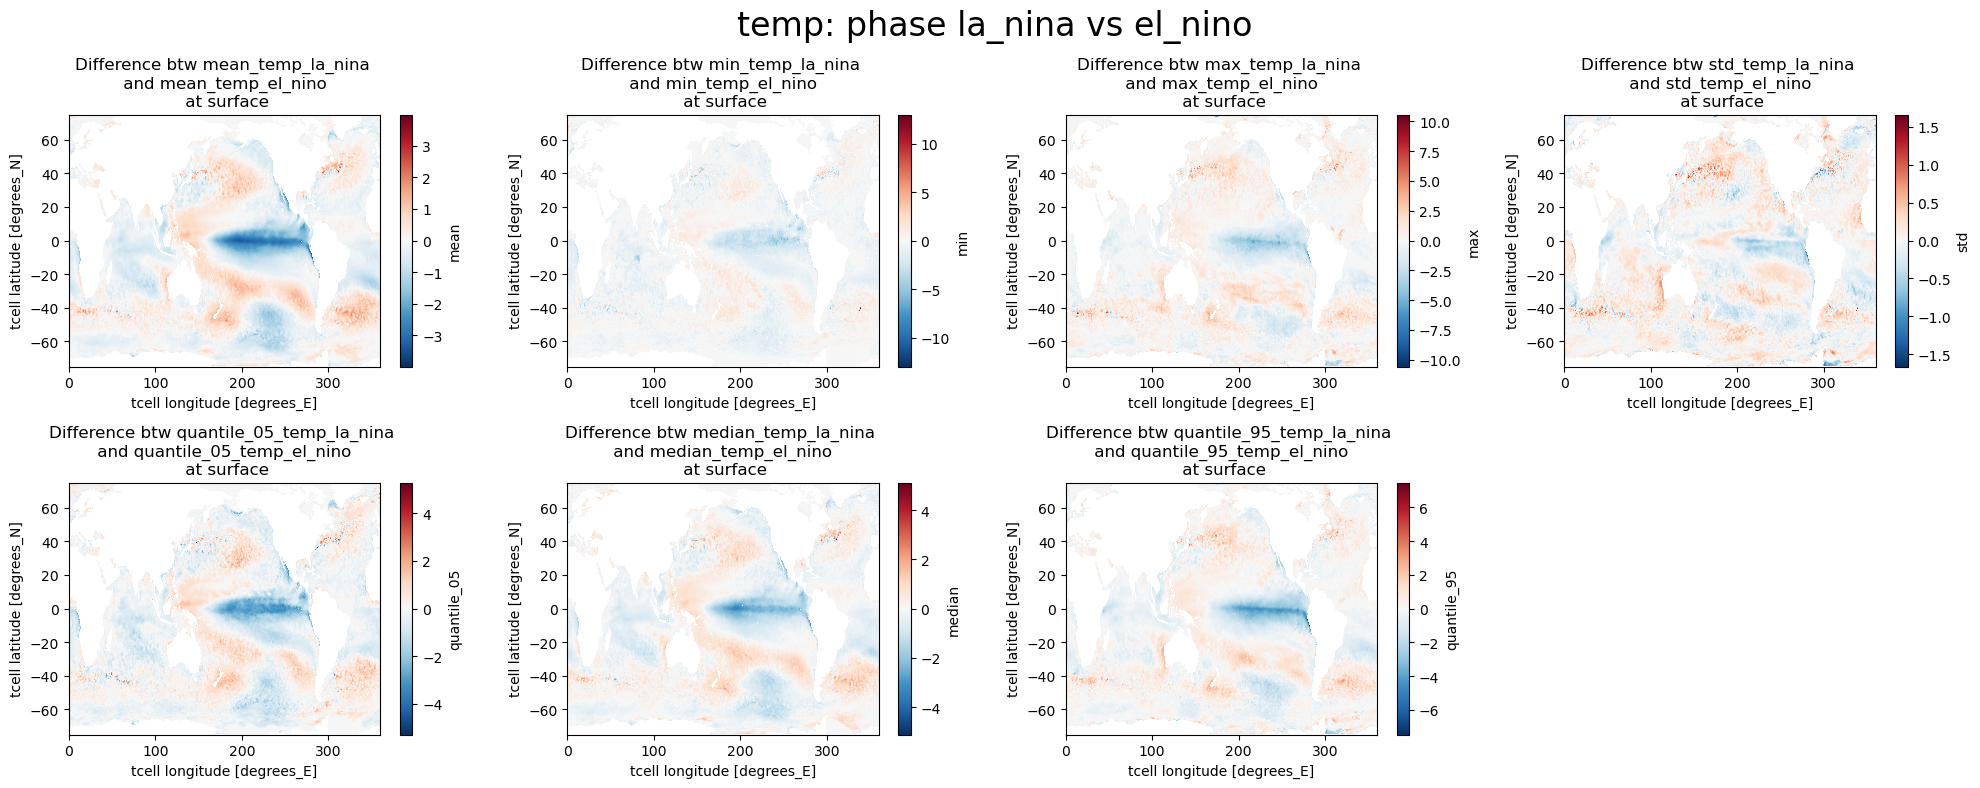

In [13]:
core_var = 'temp'
phase1 = 'la_nina'
phase2 = 'el_nino'

ds1 = load_GISready_ds(core_var=core_var,phase=phase1)
ds2 = load_GISready_ds(core_var=core_var,phase=phase2)


# Define a list of prefixes
prefixes = ['mean','min','max','std','quantile_05','median','quantile_95']

matching_vars_ds1 = find_matching_vars(ds1,prefixes)
matching_vars_ds2 = find_matching_vars(ds2,prefixes)


# Calculate number of subplots needed
num_prefixes = len(prefixes)
num_cols = 4
num_rows = (num_prefixes + num_cols - 1) // num_cols  # Ceiling division

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()



for i, prefix in enumerate(prefixes):

    diff = ds1[matching_vars_ds1[prefix]].rename({matching_vars_ds1[prefix][0]:prefix}) - ds2[matching_vars_ds2[prefix]].rename({matching_vars_ds2[prefix][0]:prefix})
    diff = diff.isel({'st_ocean': 0, 'month': 0})

    # Plot the difference
    diff[prefix].plot(ax=axes[i], cmap='RdBu_r')
    axes[i].set_title(f'Difference btw {matching_vars_ds1[prefix][0]} \n and {matching_vars_ds2[prefix][0]} \n at surface')
    i += 1

# Remove any empty subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.suptitle(t = core_var+': phase '+ phase1 +' vs ' + phase2,fontsize=24, color='black')
plt.tight_layout()
plt.show()

In [ ]:
ds2[matching_vars_ds2[prefix]]

In [ ]:
def build_nc_path_list(root_directory = "/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/",search_string = "_temp_"):
    file_paths = []
    for root, dirs, files in os.walk(root_directory):
        for file in files:
            if file.endswith(".nc") and search_string in file:
                    file_paths.append(os.path.join(root, file))
    file_paths.sort()
    return file_paths

In [ ]:
def build_nc_path_list(root_directory="/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/", search_string="_temp_", search_string2="neutral"):
    file_paths = []
    for root, dirs, files in os.walk(root_directory):
        if search_string2 in dirs:
            for file in files:
                if file.endswith(".nc") and search_string in file:
                    file_paths.append(os.path.join(root, file))
        file_paths.sort()
    return file_paths

In [ ]:
file_paths = build_nc_path_list(root_directory="/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_GISready_results/", search_string="_temp_", search_string2="neutral")
file_paths

In [ ]:
temp = xr.open_mfdataset(build_nc_path_list(),parallel=True,concat_dim='month', combine='nested').groupby('month').first()
salt = xr.open_mfdataset(build_nc_path_list(search_string = "_salt_"),parallel=True,concat_dim='month', combine='nested').groupby('month').first()
u = xr.open_mfdataset(build_nc_path_list(search_string = "_u_"),parallel=True,concat_dim='month', combine='nested').groupby('month').first()
v = xr.open_mfdataset(build_nc_path_list(search_string = "_v_"),parallel=True,concat_dim='month', combine='nested').groupby('month').first()
mld = xr.open_mfdataset(build_nc_path_list(search_string = "_mld_"),parallel=True,concat_dim='month', combine='nested').groupby('month').first()
eta_t = xr.open_mfdataset(build_nc_path_list(search_string = "_eta_t_"),parallel=True,concat_dim='month', combine='nested').groupby('month').first()

In [ ]:
check_path = '/g/data/es60/users/thomas_moore/clim_demo_results/daily/bran2020_final_results/'

In [ ]:
temp2 = xr.open_mfdataset(check_path+'*temp*.nc',chunks={})

In [ ]:
temp2 - temp

In [ ]:
# Calculate the difference for each variable
ds_diff = temp2 - temp

# Plotting
variables = ds_diff.data_vars.keys()
num_vars = len(variables)

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 30))  # Adjust the layout as needed
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    ds_diff[var].isel(month=0, st_ocean=0).plot(ax=ax)  # Adjust the slicing as needed
    ax.set_title(var)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
temp = xr.open_mfdataset(folder_paths[8]+'/*.nc',parallel=True,concat_dim='month', combine='nested')

In [ ]:
temp.mean_temp_el_nino.isel(st_ocean=0).sel(yt_ocean = -20,method='nearest').mean('xt_ocean').plot()

## coordinate nomeclature

In [ ]:
coordinate_names = {
    "lat_name_dict": {
        "temp": "yt_ocean",
        "salt": "yt_ocean",
        "u": "yu_ocean",
        "v": "yu_ocean",
        "mld": "yt_ocean",
        "eta_t": "yt_ocean"
    },
    "lon_name_dict": {
        "temp": "xt_ocean",
        "salt": "xt_ocean",
        "u": "xu_ocean",
        "v": "xu_ocean",
        "mld": "xt_ocean",
        "eta_t": "xt_ocean"
    },
    "depth_name_dict": {
        "temp": "st_ocean",
        "salt": "st_ocean",
        "u": "st_ocean",
        "v": "st_ocean"
    }
}

# $The$ $End$

In [ ]:
client.shutdown()